<h1 align="center"> Practical Class 2 - Ideal ADC and DAC modelling </h1>

<p align="justify">
In this class, the models of an ideal ADC and DAC biased with a Vref voltage and N bits of resolution are defined.
</p>

In [ ]:
from functools import reduce
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# define the function to convert a binary vector to decimal
def bin2dec(x, width):
    """Convert a numpy array from binary to decimal
    Parameters:
        x: numpy array
        b: base of the number system
    """
    x = np.array(x)
    if x.size == width:
        assert len(x) == width, "The length of the vector must be equal to the number of bits"
        return reduce(lambda x,b: 2*x + b, x)
    assert len(x[0]) == width, "The length of the vector must be equal to the number of bits"
    return np.array(np.array([reduce(lambda xval,b: 2*xval + b, xval) for xval in x]))
def dec2bin(x, width):
    """Convert a numpy array from decimal to binary
    Parameters:
        x: numpy array
        b: base of the number system
    """
    x = np.array(x)
    if x.size == 1:
        return np.array([int(c) for c in np.binary_repr(x, width=width)])
    return np.array([np.array([int(c) for c in np.binary_repr(subx, width=width)]) for subx in x])

# test 
x = np.array([1,0,1,1,0,1])
assert bin2dec(x,6) == 45
x = np.array([1,0,1])
assert bin2dec(x,3) == 5

In [13]:
# Modelling an ideal DAC
vref = 5 # V
n_bits = 3
# define the ideal model of a DAC using lambda programming
def ideal_dac(vref:float, n_bits:int):
    vlsb = vref/(2**n_bits)
    return lambda x: bin2dec(x, n_bits)*vlsb

[0 1 2 3 4 5 6 7]
[[0 0 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]
 [1 0 0]
 [1 0 1]
 [1 1 0]
 [1 1 1]]
0.625


C:\Users\dasdi\AppData\Local\Temp\ipykernel_5828\1773687008.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_bin_str, rotation=45)


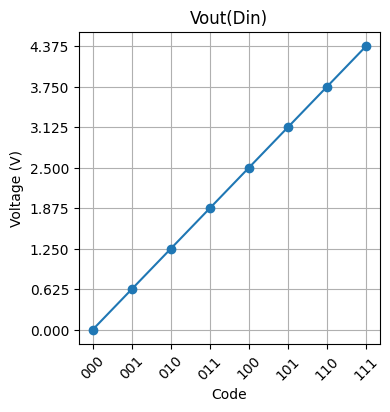

In [14]:
# trace the ideal DAC'S transfer function
idac = ideal_dac(vref, n_bits)
x = np.arange(2**n_bits)
print(x)
x_bin = np.array([dec2bin(i, n_bits) for i in x])
x_bin_str = [ "".join([str(num) for num in xv]) for xv in x_bin]
print(x_bin)
print(idac(x_bin[1]))
y = idac(x_bin)
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(x_bin_str, y, marker="o")
ax.set_xticklabels(x_bin_str, rotation=45)
ax.set_yticks(y)
ax.set_xlabel('Code')
ax.set_ylabel('Voltage (V)')
fig.tight_layout()
ax.set_title("Vout(Din)")
ax.grid(True)

In [15]:
# modelling an ideal ADC
vref = 5 # V
n_bits = 3 # bits

def ideal_adc(vref:float, nbits:int, roundf):
    assert roundf in [np.round, np.ceil, np.floor], "The round function must be numpy.floor, numpy.ceil or numpy.round"
    vlsb = vref/(2**nbits)
    return lambda x: dec2bin(roundf(x/vlsb).astype(int), nbits)

[[0 0 0]
 [0 1 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]
['000', '001', '010', '011', '100', '101', '110', '111']


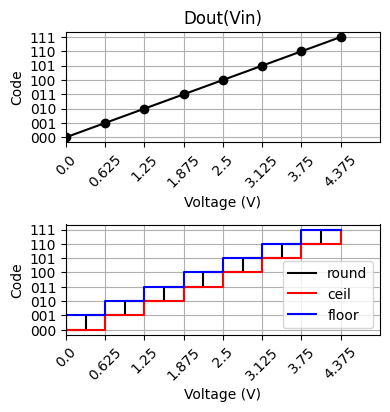

In [16]:
iadc = ideal_adc(vref, n_bits, np.round)
iadc_ceil = ideal_adc(vref, n_bits, np.ceil)
iadc_floor = ideal_adc(vref, n_bits, np.floor)
print(iadc(np.array([0,1,2,3,4])))
x = np.arange(0, vref,vref/2**n_bits)
y = iadc(x)
y_str = [ "".join([str(num) for num in yv]) for yv in y]
print(y_str)
fig, ax = plt.subplots(2,1, figsize=(4,4))
ax[0].plot(x, y_str, marker="o", color="k")
ax[0].set_xticks(x)
ax[0].set_xticklabels(x, rotation=45)
ax[0].set_xlabel('Voltage (V)')
ax[0].set_ylabel('Code')
ax[1].step(x, y_str, marker="None", color="k", label="round", where="mid")
y = iadc_ceil(x)
y_str = [ "".join([str(num) for num in yv]) for yv in y]
ax[1].step(x, y_str, marker="None", color="r", label="ceil", where="post")
ax[1].set_xticks(x)
ax[1].set_xticklabels(x, rotation=45)
ax[1].set_xlabel('Voltage (V)')
ax[1].set_ylabel('Code')
y = iadc_floor(x)
y_str = [ "".join([str(num) for num in yv]) for yv in y]
ax[1].step(x, y_str, marker="None", color="b", label="floor", where="pre")
ax[1].set_xticks(x)
ax[1].set_xticklabels(x, rotation=45)
ax[1].set_xlabel('Voltage (V)')
ax[1].set_ylabel('Code')

ax[0].set_xlim([0, vref])
ax[1].set_xlim([0, vref])
fig.tight_layout()
ax[0].set_title("Dout(Vin)")
ax[0].grid(True)
ax[1].grid(True)
ax[1].legend()